In [1]:
%matplotlib inline

/Users/zhouyu/Documents/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/zhouyu/Google Drive/python4work/')

### total 286 patches from 9 cells (only include responses to image pic 00152)

In [3]:
dataset_NLI = pd.read_csv('patch_NLI_excVSSpikes.csv')
dataset_NLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
Unnamed: 0    286 non-null int64
imageName     286 non-null int64
Loc_x         286 non-null int64
Loc_y         286 non-null int64
cell_id       286 non-null object
patchId       286 non-null object
spike_NLI     286 non-null float64
exc_NLI       286 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.9+ KB


In [4]:
len(dataset_NLI.cell_id.unique())

9

### NLIs are calculated as:
### (r_image - r_disc)/(r_image + r_disc)

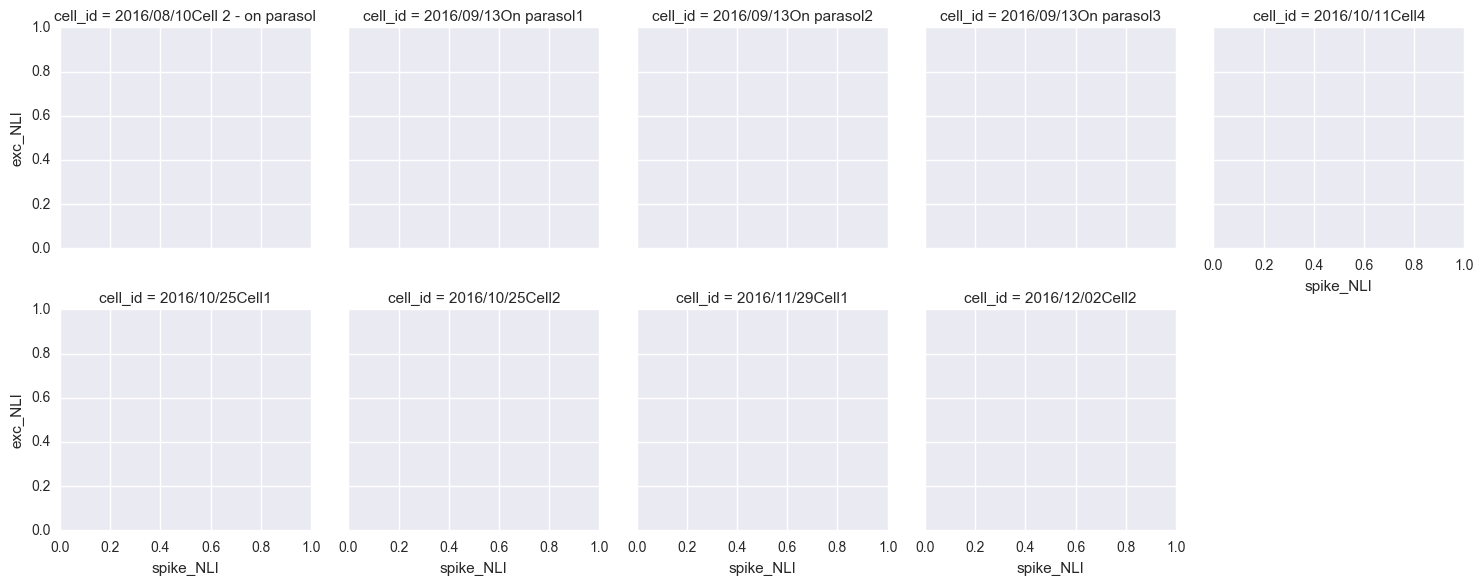

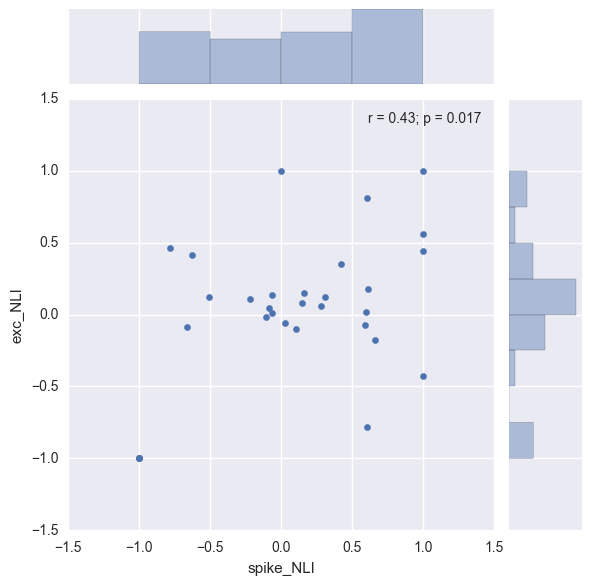

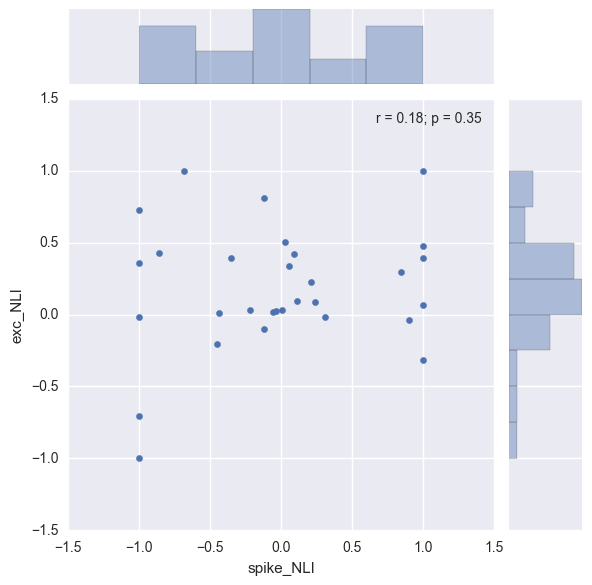

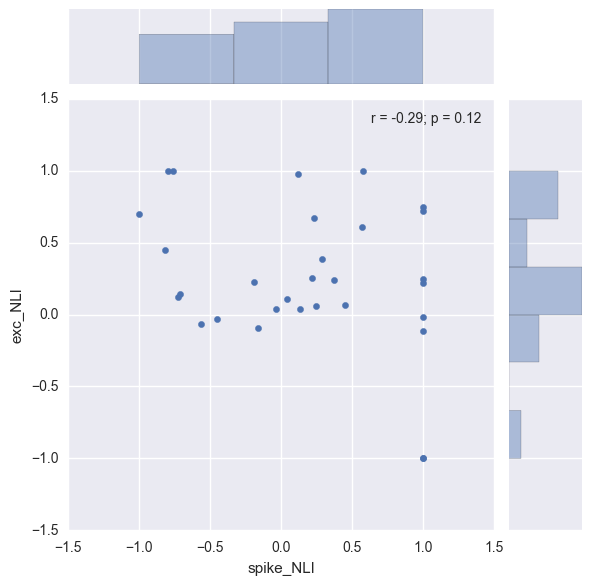

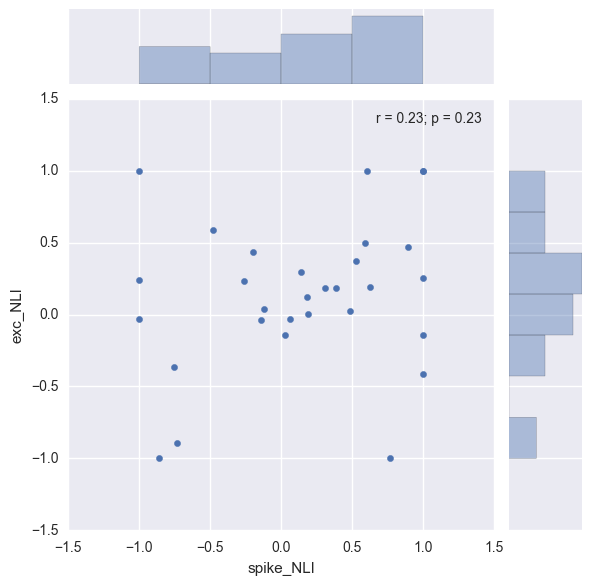

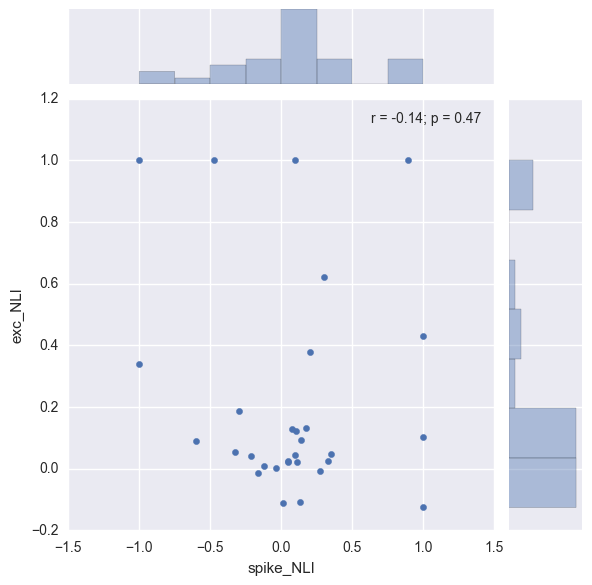

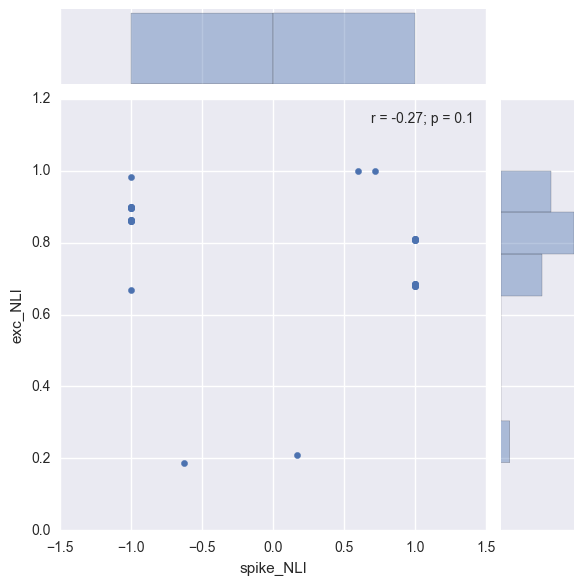

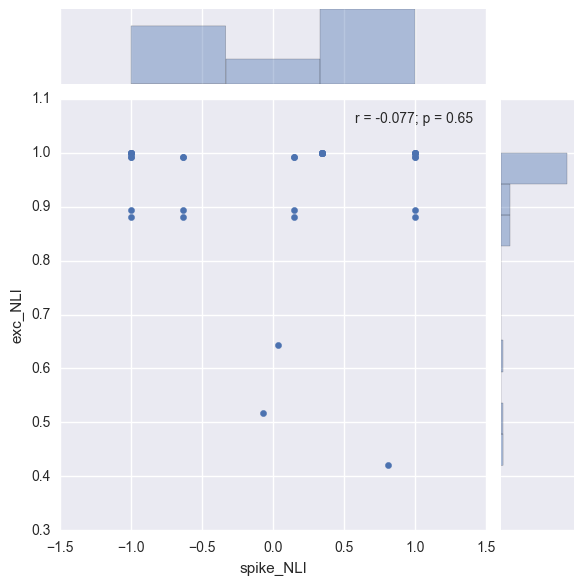

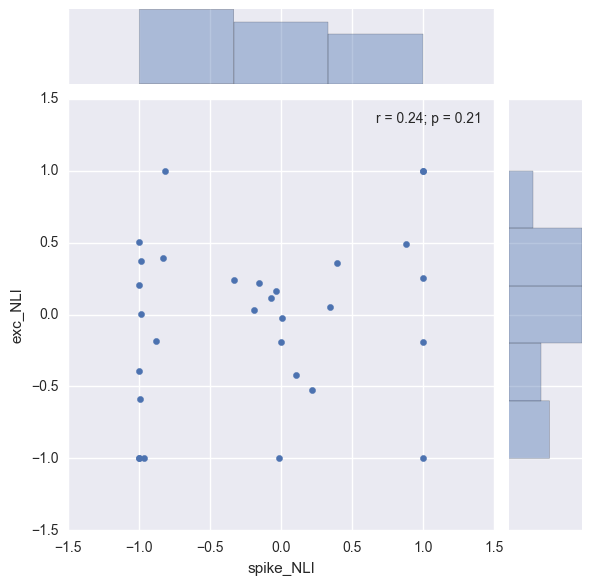

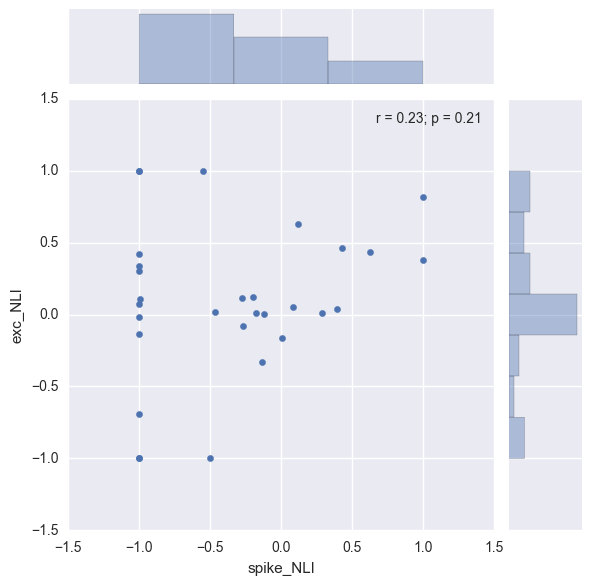

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(dataset_NLI,col = "cell_id",col_wrap = 5)
g = g.map(sns.jointplot,"spike_NLI","exc_NLI",annot_kws=dict(stat="r"))

### Conclusion: Given that NLI distributions are highly non-gaussian, use p(NLI > 0) to quantify the nonlinearity

### calculate p(NLI> 0) for each cells

In [19]:
import numpy as np
def isPositive(x):
    a = np.array(x)
    return sum(a>0)/float(len(a))
grouped = dataset_NLI.groupby("cell_id")
grouped['exc_NLI','spike_NLI'].aggregate(isPositive)

,exc_NLI,spike_NLI
cell_id,,
2016/08/10Cell 2 - on parasol,0.633333,0.566667
2016/09/13On parasol1,0.733333,0.500000
2016/09/13On parasol2,0.766667,0.633333
2016/09/13On parasol3,0.666667,0.633333
2016/10/11Cell4,0.833333,0.666667
2016/10/25Cell1,1.000000,0.500000
2016/10/25Cell2,1.000000,0.605263
2016/11/29Cell1,0.566667,0.400000
2016/12/02Cell2,0.700000,0.300000
